In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
block_size = 3
X, Y = [], []
for w in words[:5]:
    context = [0]*block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)
X, Y

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1],
         [ 0,  0,  0],
         [ 0,  0, 15],
         [ 0, 15, 12],
         [15, 12,  9],
         [12,  9, 22],
         [ 9, 22,  9],
         [22,  9,  1],
         [ 0,  0,  0],
         [ 0,  0,  1],
         [ 0,  1, 22],
         [ 1, 22,  1],
         [ 0,  0,  0],
         [ 0,  0,  9],
         [ 0,  9, 19],
         [ 9, 19,  1],
         [19,  1,  2],
         [ 1,  2,  5],
         [ 2,  5, 12],
         [ 5, 12, 12],
         [12, 12,  1],
         [ 0,  0,  0],
         [ 0,  0, 19],
         [ 0, 19, 15],
         [19, 15, 16],
         [15, 16,  8],
         [16,  8,  9],
         [ 8,  9,  1]]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [6]:
X.shape, Y.shape, X.dtype, Y.dtype

(torch.Size([32, 3]), torch.Size([32]), torch.int64, torch.int64)

In [7]:
C = torch.randn((27,2))

In [8]:
C

tensor([[-1.0930, -0.4268],
        [ 0.0820, -0.0620],
        [-0.2449, -0.0207],
        [ 0.4452, -0.4018],
        [ 0.5828,  0.3679],
        [-0.3277,  1.2833],
        [-0.5567, -1.9257],
        [-1.0785, -1.1523],
        [ 1.3762, -0.1978],
        [ 1.0277,  1.3164],
        [-1.1770, -0.7530],
        [ 0.1240, -0.2351],
        [-1.6998, -0.3647],
        [ 1.5099,  0.1672],
        [-1.8065,  0.0753],
        [ 0.3375, -1.0636],
        [-0.0305,  0.5801],
        [-0.8858,  0.1821],
        [ 1.1037,  0.2540],
        [-0.3678, -1.2620],
        [-0.0099,  0.5427],
        [ 0.8055, -0.3053],
        [ 1.9682, -1.6132],
        [-2.0108,  0.5969],
        [ 0.6811,  1.0935],
        [ 0.4655,  0.4064],
        [ 0.8871,  0.3550]])

In [9]:
# Create embedding matrix
emb = C[X]
emb.shape, emb

(torch.Size([32, 3, 2]),
 tensor([[[-1.0930, -0.4268],
          [-1.0930, -0.4268],
          [-1.0930, -0.4268]],
 
         [[-1.0930, -0.4268],
          [-1.0930, -0.4268],
          [-0.3277,  1.2833]],
 
         [[-1.0930, -0.4268],
          [-0.3277,  1.2833],
          [ 1.5099,  0.1672]],
 
         [[-0.3277,  1.2833],
          [ 1.5099,  0.1672],
          [ 1.5099,  0.1672]],
 
         [[ 1.5099,  0.1672],
          [ 1.5099,  0.1672],
          [ 0.0820, -0.0620]],
 
         [[-1.0930, -0.4268],
          [-1.0930, -0.4268],
          [-1.0930, -0.4268]],
 
         [[-1.0930, -0.4268],
          [-1.0930, -0.4268],
          [ 0.3375, -1.0636]],
 
         [[-1.0930, -0.4268],
          [ 0.3375, -1.0636],
          [-1.6998, -0.3647]],
 
         [[ 0.3375, -1.0636],
          [-1.6998, -0.3647],
          [ 1.0277,  1.3164]],
 
         [[-1.6998, -0.3647],
          [ 1.0277,  1.3164],
          [ 1.9682, -1.6132]],
 
         [[ 1.0277,  1.3164],
          [ 1.9

In [10]:
X[13], C[X][13]

(tensor([0, 0, 1]),
 tensor([[-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [ 0.0820, -0.0620]]))

In [11]:
#Randomly initialized weights and biases
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
W1, b1

(tensor([[-9.2211e-01,  7.5306e-01,  7.8995e-01, -7.2484e-01, -3.9582e-01,
          -7.2822e-01, -9.3285e-01,  8.0370e-01, -6.2950e-01, -1.2483e+00,
           1.3236e-01,  2.7504e-01,  1.4655e-02,  4.1024e-01, -3.2124e-01,
          -6.5802e-01,  3.7295e-01,  1.0444e+00, -4.7792e-01,  1.0373e+00,
           4.7160e-01, -1.4727e+00, -2.6258e-01,  6.1874e-01, -2.5905e-03,
          -5.0684e-01, -2.6885e-01,  9.1046e-01,  5.0543e-01,  3.7209e-01,
          -1.0848e+00,  9.7717e-01,  1.4167e+00,  5.6252e-01, -1.3684e-01,
          -1.3115e+00, -5.3103e-01, -1.9792e+00, -5.5579e-01,  4.3327e-01,
          -1.0561e+00,  2.6706e-01, -1.6396e+00,  1.4795e+00,  1.0566e+00,
          -7.1630e-01, -7.0903e-01, -1.3207e+00,  7.3630e-01,  1.4228e+00,
          -4.1350e-01,  1.8248e+00, -4.6528e-01,  1.0478e+00,  6.3121e-01,
          -6.2098e-01, -4.1941e-01, -5.5113e-01, -4.5087e-01,  8.8973e-01,
           1.4701e+00, -7.4405e-01, -8.7177e-01, -3.7834e-01,  3.3891e-01,
           9.0769e-01, -1

In [12]:
W1.shape, b1.shape

(torch.Size([6, 100]), torch.Size([100]))

In [13]:
# 3 Input nueron example
emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]

(tensor([[-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-0.3277,  1.2833],
         [ 1.5099,  0.1672],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [ 0.3375, -1.0636],
         [-1.6998, -0.3647],
         [ 1.0277,  1.3164],
         [ 1.9682, -1.6132],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [ 0.0820, -0.0620],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [ 1.0277,  1.3164],
         [-0.3678, -1.2620],
         [ 0.0820, -0.0620],
         [-0.2449, -0.0207],
         [-0.3277,  1.2833],
         [-1.6998, -0.3647],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-0.3678, -1.2620],
         [ 0.3375, -1.0636],
         [-0.0305,  0.5801],
         [ 1.3762, -0.1978]]),
 tensor([[-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-0

In [14]:
# Concatinating the second dimension of each to match Weight Matrix W1's dimensions
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[-1.0930, -0.4268, -1.0930, -0.4268, -1.0930, -0.4268],
        [-1.0930, -0.4268, -1.0930, -0.4268, -0.3277,  1.2833],
        [-1.0930, -0.4268, -0.3277,  1.2833,  1.5099,  0.1672],
        [-0.3277,  1.2833,  1.5099,  0.1672,  1.5099,  0.1672],
        [ 1.5099,  0.1672,  1.5099,  0.1672,  0.0820, -0.0620],
        [-1.0930, -0.4268, -1.0930, -0.4268, -1.0930, -0.4268],
        [-1.0930, -0.4268, -1.0930, -0.4268,  0.3375, -1.0636],
        [-1.0930, -0.4268,  0.3375, -1.0636, -1.6998, -0.3647],
        [ 0.3375, -1.0636, -1.6998, -0.3647,  1.0277,  1.3164],
        [-1.6998, -0.3647,  1.0277,  1.3164,  1.9682, -1.6132],
        [ 1.0277,  1.3164,  1.9682, -1.6132,  1.0277,  1.3164],
        [ 1.9682, -1.6132,  1.0277,  1.3164,  0.0820, -0.0620],
        [-1.0930, -0.4268, -1.0930, -0.4268, -1.0930, -0.4268],
        [-1.0930, -0.4268, -1.0930, -0.4268,  0.0820, -0.0620],
        [-1.0930, -0.4268,  0.0820, -0.0620,  1.9682, -1.6132],
        [ 0.0820, -0.0620,  1.9682, -1.6

In [15]:
# Example of torch.unbind
torch.unbind(emb, 1)

(tensor([[-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-0.3277,  1.2833],
         [ 1.5099,  0.1672],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [ 0.3375, -1.0636],
         [-1.6998, -0.3647],
         [ 1.0277,  1.3164],
         [ 1.9682, -1.6132],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [ 0.0820, -0.0620],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [ 1.0277,  1.3164],
         [-0.3678, -1.2620],
         [ 0.0820, -0.0620],
         [-0.2449, -0.0207],
         [-0.3277,  1.2833],
         [-1.6998, -0.3647],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-0.3678, -1.2620],
         [ 0.3375, -1.0636],
         [-0.0305,  0.5801],
         [ 1.3762, -0.1978]]),
 tensor([[-1.0930, -0.4268],
         [-1.0930, -0.4268],
         [-0

In [16]:
# Using cat and unvind together to avoid hardcoding dimensions and match emb and W1's dimensions
torch.cat(torch.unbind(emb , 1), 1)
# Output is same as torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1) but neurons and dimensions are not hard-coded, therefore is better for variable block_size

tensor([[-1.0930, -0.4268, -1.0930, -0.4268, -1.0930, -0.4268],
        [-1.0930, -0.4268, -1.0930, -0.4268, -0.3277,  1.2833],
        [-1.0930, -0.4268, -0.3277,  1.2833,  1.5099,  0.1672],
        [-0.3277,  1.2833,  1.5099,  0.1672,  1.5099,  0.1672],
        [ 1.5099,  0.1672,  1.5099,  0.1672,  0.0820, -0.0620],
        [-1.0930, -0.4268, -1.0930, -0.4268, -1.0930, -0.4268],
        [-1.0930, -0.4268, -1.0930, -0.4268,  0.3375, -1.0636],
        [-1.0930, -0.4268,  0.3375, -1.0636, -1.6998, -0.3647],
        [ 0.3375, -1.0636, -1.6998, -0.3647,  1.0277,  1.3164],
        [-1.6998, -0.3647,  1.0277,  1.3164,  1.9682, -1.6132],
        [ 1.0277,  1.3164,  1.9682, -1.6132,  1.0277,  1.3164],
        [ 1.9682, -1.6132,  1.0277,  1.3164,  0.0820, -0.0620],
        [-1.0930, -0.4268, -1.0930, -0.4268, -1.0930, -0.4268],
        [-1.0930, -0.4268, -1.0930, -0.4268,  0.0820, -0.0620],
        [-1.0930, -0.4268,  0.0820, -0.0620,  1.9682, -1.6132],
        [ 0.0820, -0.0620,  1.9682, -1.6

In [17]:
# Efficient way is to use torch.view instead of cat and/or unbind
emb.view(emb.shape[0], 6)
# Output is same as torch.cat(torch.unbind(emb , 1), 1) but is much more efficient than cat as .view() manipulates 'storage' component of neurons instead of creating new neurons

tensor([[-1.0930, -0.4268, -1.0930, -0.4268, -1.0930, -0.4268],
        [-1.0930, -0.4268, -1.0930, -0.4268, -0.3277,  1.2833],
        [-1.0930, -0.4268, -0.3277,  1.2833,  1.5099,  0.1672],
        [-0.3277,  1.2833,  1.5099,  0.1672,  1.5099,  0.1672],
        [ 1.5099,  0.1672,  1.5099,  0.1672,  0.0820, -0.0620],
        [-1.0930, -0.4268, -1.0930, -0.4268, -1.0930, -0.4268],
        [-1.0930, -0.4268, -1.0930, -0.4268,  0.3375, -1.0636],
        [-1.0930, -0.4268,  0.3375, -1.0636, -1.6998, -0.3647],
        [ 0.3375, -1.0636, -1.6998, -0.3647,  1.0277,  1.3164],
        [-1.6998, -0.3647,  1.0277,  1.3164,  1.9682, -1.6132],
        [ 1.0277,  1.3164,  1.9682, -1.6132,  1.0277,  1.3164],
        [ 1.9682, -1.6132,  1.0277,  1.3164,  0.0820, -0.0620],
        [-1.0930, -0.4268, -1.0930, -0.4268, -1.0930, -0.4268],
        [-1.0930, -0.4268, -1.0930, -0.4268,  0.0820, -0.0620],
        [-1.0930, -0.4268,  0.0820, -0.0620,  1.9682, -1.6132],
        [ 0.0820, -0.0620,  1.9682, -1.6

In [18]:
# Creating second layer (hidden layer of activations) of NN 
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
h, h.shape
# Keep in mind broadcasting rules for b1. Not to worry in this case

(tensor([[-0.7593,  0.4408, -0.9922,  ..., -0.9957,  0.9742,  0.4449],
         [-0.9940,  0.0386, -0.9554,  ..., -0.9973,  0.8146, -0.0189],
         [-0.9945, -0.9932, -0.6448,  ...,  0.9981, -0.9166,  0.9945],
         ...,
         [-0.9963, -0.9674,  0.3581,  ...,  0.9990, -0.6609,  1.0000],
         [-0.7238, -0.4783,  0.4331,  ...,  0.9972,  0.9661, -0.9518],
         [-0.7426,  0.2670,  0.7686,  ...,  0.9811,  0.7985,  0.9954]]),
 torch.Size([32, 100]))

In [19]:
#Creating second layer with 27 possible outcome
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [20]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [21]:
# Adding fake counts for 0 value parameters by exponentiating the parameters
counts = logits.exp()
counts

tensor([[2.3981e-01, 9.3056e+00, 4.7516e-10, 4.6866e-08, 3.5676e+00, 7.3368e-01,
         4.4100e-07, 5.2127e-02, 5.1590e+00, 8.7047e-07, 5.6522e-05, 3.4657e-04,
         8.0022e-01, 1.2409e+01, 2.1269e+03, 1.4837e-03, 5.8053e+04, 1.5400e+01,
         1.6193e+01, 3.6254e+03, 3.9074e+04, 4.0026e+04, 4.1695e-01, 1.1853e-08,
         3.8352e-01, 7.9293e+05, 7.7682e-01],
        [8.9424e-04, 7.7803e-01, 4.4585e-09, 8.8474e-07, 6.5996e-01, 2.2033e-05,
         1.5930e-05, 1.3936e-05, 9.2642e-03, 1.6585e-07, 3.3683e-05, 8.0366e-05,
         1.9594e-04, 1.2439e+00, 3.4001e+01, 5.8990e-02, 2.4080e+06, 2.0585e+05,
         7.9728e-01, 1.0928e+01, 4.8401e+01, 3.4962e+03, 1.7808e-02, 6.3355e-07,
         9.8828e+00, 5.6710e+04, 1.1120e+00],
        [1.5111e+02, 6.7252e+00, 4.7367e-02, 1.8843e+07, 1.3638e+03, 3.5349e-01,
         1.6381e-01, 1.0333e-02, 1.9335e-04, 8.7114e-01, 1.3176e+01, 1.5410e-02,
         2.4294e-03, 4.2170e-02, 4.5514e-05, 1.9417e-01, 1.0433e+01, 1.2120e+01,
         3.0940e+

In [22]:
# Normalising counts by creating probability matrix
prob = counts / counts.sum(1, keepdims=True)

In [23]:
prob.shape, prob[0].sum()

(torch.Size([32, 27]), tensor(1.))

In [24]:
# Calculating loss manually i.e Negative Log Likelihood
loss = -prob[torch.arange(32), Y].log().mean()

In [25]:
loss

tensor(14.8950)

In [26]:
# Pytorch introduces a much more efficient and readable way to calculate this same loss using "Cross Entropy"
loss = F.cross_entropy(logits, Y)
loss

tensor(14.8950)

In [27]:
# -------- Arranging everything for readability ------------

In [28]:
# Dataset
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [32]:
g = torch.Generator().manual_seed(2147483647) # for same result reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [33]:
sum(p.nelement() for p in parameters) # total number of parameters

3481

In [35]:
emb = C[X] # Embeddings (32, 3, 2)
# First layer will be 3 input embeddings
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
logits = h @ W2 + b2 # Third Layer (32, 27)
counts = logits.exp() # Fake Counts to prevent inf nll
prob = counts / counts.sum(1, keepdims=True) # Probability matrix/ normalised counts
loss = -prob[torch.arange(32), Y].log().mean() # Negative Log likelihood loss
loss

tensor(17.7697)

In [38]:
# Calculating loss efficiently using pytorch
loss = F.cross_entropy(logits, Y) # We will use this as it is efficient and is better for backpropogation as well
loss

tensor(17.7697)

In [40]:
for p in parameters:
    p.requires_grad = True

In [42]:
for _ in range(100):
    # FORWARD PASS
    emb = C[X] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad

3.9858498573303223
3.6028313636779785
3.2621419429779053
2.961381435394287
2.6982975006103516
2.469712495803833
2.271660804748535
2.1012837886810303
1.9571770429611206
1.837485671043396
1.7380964756011963
1.6535117626190186
1.5790902376174927
1.5117673873901367
1.4496052265167236
1.391312599182129
1.3359929323196411
1.2830536365509033
1.232191801071167
1.1833819150924683
1.1367989778518677
1.0926649570465088
1.0510928630828857
1.012027382850647
0.9752706289291382
0.9405570030212402
0.9076128602027893
0.8761926293373108
0.8460893630981445
0.8171359300613403
0.7891993522644043
0.7621751427650452
0.7359815835952759
0.710558295249939
0.6858614087104797
0.6618655323982239
0.6385658383369446
0.6159822344779968
0.594166100025177
0.573210597038269
0.5532565712928772
0.5344884991645813
0.5171172618865967
0.501331627368927
0.4872431457042694
0.4748407006263733
0.4639979302883148
0.4545147120952606
0.44617128372192383
0.43876662850379944
0.43213337659835815
0.42613911628723145
0.4206799268722534


In [45]:
block_size = 3
X, Y = [], []
for w in words: # use all words instead of first 5
    context = [0]*block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [46]:
# The loss is so less because we are overfitting the data. That is, we are feeding just 32 inputs to 3481 parameters
# For efficiency we will create batches of data of size 32 like this
torch.randint(0, X.shape[0], (32,))

tensor([208200,  31568, 190494,  75912,  94504, 138189, 160639, 153969, 104400,
        190460, 199338, 220085,  62629,  15161, 155079,  36966, 189953,  14279,
        212474,  62998, 157120,  71317, 193494, 180368, 216041,  64664,  25193,
         80240, 165418, 156072,  48684, 126411])

In [48]:
#Using batches
for _ in range(100):
    ix = torch.randint(0, X.shape[0], (32,))
    # FORWARD PASS
    emb = C[X[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad
# This will be much faster than training the model on all 32000+ words
# Even tho the quality of gradient is not that much reliable, it is pretty good if we keep speed in mind

4.816551208496094
3.99900484085083
3.70257568359375
4.36957311630249
4.043515205383301
3.8395304679870605
3.999135971069336
3.5969462394714355
4.688202381134033
3.367837905883789
3.7522029876708984
4.225220203399658
4.26640510559082
4.146937847137451
4.067058563232422
4.324132919311523
2.986145496368408
3.82460355758667
3.3073461055755615
4.307409763336182
3.848804235458374
3.620663642883301
2.765113353729248
3.7233009338378906
3.881305694580078
3.719640016555786
4.046329498291016
4.057267189025879
4.291866779327393
4.660467147827148
4.508404731750488
3.689263343811035
3.447281837463379
4.01051139831543
3.8550305366516113
3.5758094787597656
3.411031484603882
4.486516952514648
2.9746298789978027
3.0283727645874023
4.621485710144043
3.7561583518981934
4.043057918548584
3.100371837615967
3.966264247894287
3.5500662326812744
4.232510089874268
3.568286418914795
3.8858444690704346
3.342175245285034
3.084225654602051
3.87994122505188
3.7470390796661377
3.8616867065429688
3.863570213317871
2.9

In [54]:
# How determine a good learning rate?
# Create an matrix (linear space) of 1000 numbers (1000 possible learning rates) between 0.001 (When loss decreases but at a slow pace) and 1 (When loss starts to burst)
lre = torch.linspace(-3, 0, 1000) # Learning rate exponent 
lrs = 10**lre # 10**-3 will be 0.001 and 10**0 will be 1
lrs # Exponentially spaced

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [57]:
# Reinitialisation for calculating lr
g = torch.Generator().manual_seed(2147483647) # for same result reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

lri = [] # To track lrs used
lossi = [] # To track losses that lr produced
for i in range(1000):
    ix = torch.randint(0, X.shape[0], (32,))
    # FORWARD PASS
    emb = C[X[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = lrs[i] # Changing lr with every iteration # Starting with very low 0.001 then going upto 1
    for p in parameters:
        p.data += -lr * p.grad

    # Track stats
    lri.append(lre[i])
    lossi.append(loss.item())

20.611328125
17.767536163330078
23.115434646606445
21.670909881591797
19.7050838470459
21.132583618164062
19.725933074951172
17.193397521972656
15.98493480682373
19.611289978027344
18.931562423706055
18.081636428833008
18.811193466186523
20.365774154663086
17.014699935913086
18.298093795776367
17.817638397216797
18.2940673828125
18.758708953857422
17.704893112182617
16.57598114013672
18.20486831665039
18.3070068359375
20.93640899658203
17.850994110107422
18.244962692260742
20.98422622680664
20.164051055908203
17.320859909057617
15.259566307067871
21.10274887084961
19.45884895324707
21.04018783569336
16.74399757385254
20.332456588745117
19.406147003173828
18.60762596130371
19.258657455444336
17.010644912719727
20.001617431640625
20.08252716064453
18.99116325378418
18.876998901367188
17.59842872619629
16.439250946044922
19.93418312072754
19.245454788208008
16.55605697631836
19.902008056640625
18.575849533081055
17.313602447509766
18.500974655151367
17.377574920654297
16.610885620117188
1

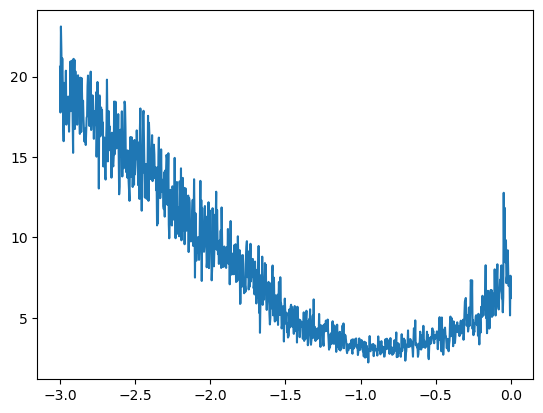

In [58]:
# Plot lri, lossi for visualisation
plt.plot(lri, lossi)
# The output shows that somewhere around -1.0 and -0.5 the loss is least.
# So we will use lr as 0.1

In [75]:
g = torch.Generator().manual_seed(2147483647) # for same result reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

for i in range(1000):
    ix = torch.randint(0, X.shape[0], (32,))
    # FORWARD PASS
    emb = C[X[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

print(loss.item())

2.414402723312378


In [78]:
# Learning rate decay - At later stages of training, we lower the learning rate to minimise gradient movement and keep on training the model
# For example - We run the model for first 20000 epochs at lr = 0.1 then set lr = 0.01 for next 10000 epochs
for i in range(1000):
    ix = torch.randint(0, X.shape[0], (32,))
    # FORWARD PASS
    emb = C[X[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.01 # Decayed lr
    for p in parameters:
        p.data += -lr * p.grad

print(loss.item())

1.978369951248169


In [ ]:
"""
When nueral net size is big, that is when there are a lot of params and the training data is less, the model learns to
underfit. 
This means that the model will learn to memorise the data in training data and what output it should produce.
Therefore the loss on training data will be much less but on test data will be much higher, therefore a bad model.

To solve this, we split the training data into 3 parts, namely: 
- Training Split(Around 80%, used to train the model params), 
- Dev/Validation Split (Around 10%, used to train the hyperparameters), 
- Test Split(Around 10%, used to evaluate the performance of model. Used only when model is trained so that model doesn't overfit on test data
as well).
"""
# Building dataset

def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w+'.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xtr, Ytr = build_dataset(words[:n1])
Xtr, Ytr = build_dataset(words[:n1])